In [54]:
from datasets import load_dataset, load_metric
import pandas as pd
from datasets import Dataset, DatasetDict
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud


# EDA for Tamil Dataset - IN22

## Load the Dataset

In [55]:
raw_dataset = load_dataset("ai4bharat/IN22-Gen", "eng_Latn-tam_Taml", trust_remote_code=True)

In [56]:
limited_data = raw_dataset

In [57]:
limited_data

DatasetDict({
    gen: Dataset({
        features: ['id', 'context', 'source', 'url', 'domain', 'num_words', 'bucket', 'sentence_eng_Latn', 'sentence_tam_Taml'],
        num_rows: 1024
    })
})

In [58]:
# Create a new DatasetDict if needed
new_dataset_dict = DatasetDict(limited_data)

# Verify the first example to ensure conversion was successful
print(new_dataset_dict["gen"][0])

{'id': 1, 'context': 'A uniform is often viewed as projecting a positive image of an organisation. Maintaining personal hygiene is also an important aspect of personal appearance and dressing. An appearance is a bunch of attributes related with the service person, like their shoes, clothes, tie, jewellery, hairstyle, make-up, watch, cosmetics, perfume, etc.', 'source': 'web', 'url': '', 'domain': 'culture', 'num_words': 24, 'bucket': '18 - 25', 'sentence_eng_Latn': 'An appearance is a bunch of attributes related to the service person, like their shoes, clothes, tie, jewellery, hairstyle, make-up, watch, cosmetics, perfume, etc.', 'sentence_tam_Taml': 'தோற்றம் என்பது சேவை ஊழியரின் காலணிகள், உடை, டை, நகை, சிகையலங்காரம், மேக்-அப், கைக்கடிகாரம், அழகு சாதனங்கள், நறுமணம் போன்ற அவர் சார்ந்த பண்புகளின் ஒரு தொகுப்பைக் குறிக்கிறது.'}


In [59]:
# Convert the dataset to a Pandas DataFrame
tamil_df = new_dataset_dict["gen"].to_pandas()

# Rename the columns
tamil_df = tamil_df.rename(columns={"sentence_eng_Latn": "en", "sentence_tam_Taml": "ta"})

# Drop the 'idx' column if it is not needed
tamil_df = tamil_df.drop(columns=['id', 'context', 'source', 'url', 'domain', 'num_words', 'bucket'])

# Display the first few rows to verify
tamil_df.head()

,en,ta
0,An appearance is a bunch of attributes related...,"தோற்றம் என்பது சேவை ஊழியரின் காலணிகள், உடை, டை..."
1,"Ajanta, located in the Aurangabad District of ...",மகாராஷ்டிரத்தின் அவுரங்காபாத் மாவட்டத்தில் உள்...
2,"Body colour gets merged with the outer line, c...",உடல் நிறம் ஓரங்களுடன் கலந்து பருமனான தோற்றத்தை...
3,Ashoka started making extensive use of stone f...,சிற்பங்களுக்கும் மாபெரும் நினைவுச் சின்னங்களுக...
4,"Potatoes mixed in masalas, coated in besan bat...",மகாராஷ்டிராவின் இந்தப் புகழ்பெற்ற அறுசுவை உணவி...


## Check Unique and Null Values

In [60]:
tamil_df.describe()

,en,ta
count,1024,1024
unique,1024,1023
top,An appearance is a bunch of attributes related...,அதன்பின் 11.04.2019 அன்று மாநிலச் சட்டசபைத் தே...
freq,1,2


In [61]:
print(tamil_df.isnull().sum())


en    0
ta    0
dtype: int64


## Plot Sentence Lengths

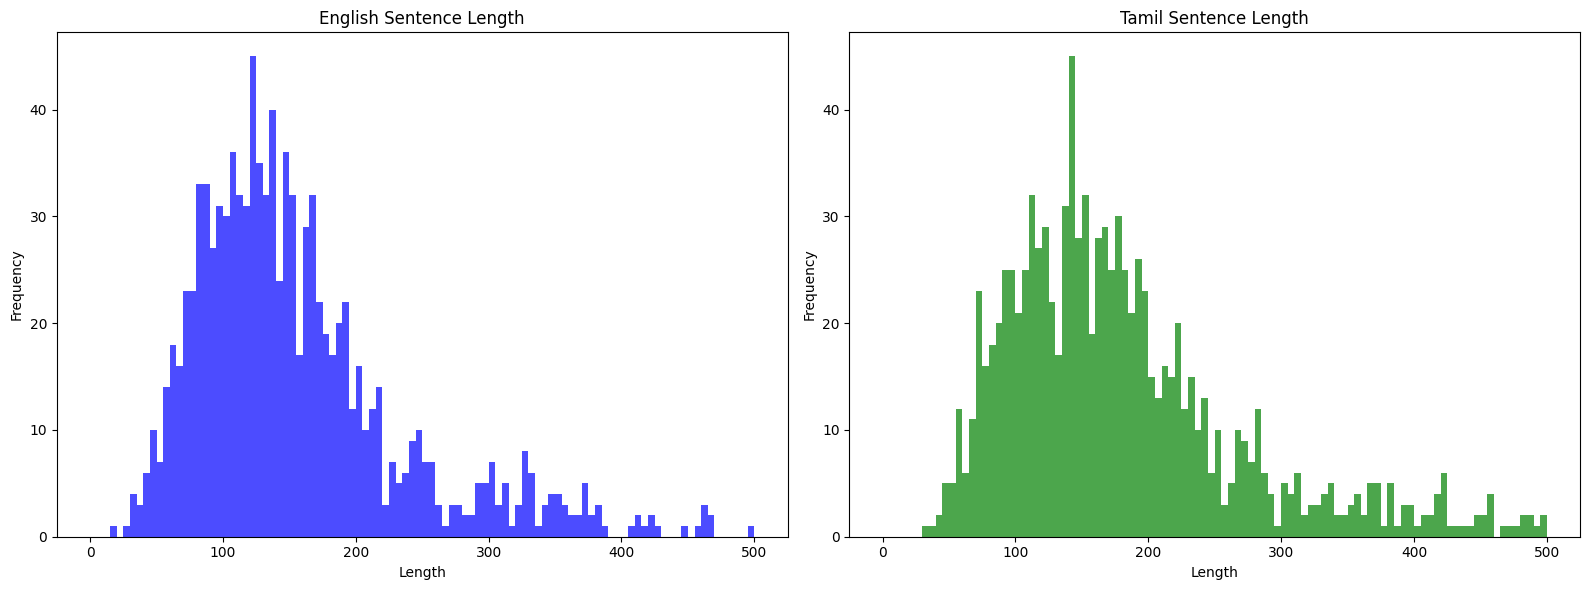

In [62]:
tamil_df['en_length'] = tamil_df['en'].apply(len)
tamil_df['ta_length'] = tamil_df['ta'].apply(len)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(tamil_df['en_length'], bins=100, range=(0, 500), color='blue', alpha=0.7)
plt.title('English Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(tamil_df['ta_length'], bins=100, range=(0, 500), color='green', alpha=0.7)
plt.title('Tamil Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



## Plot Correlation between English and Tamil Sentence Lengths

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(tamil_df['en_length'], tamil_df['ta_length'], alpha=0.5)
plt.title('Correlation Between English and Tamil Sentence Lengths')
plt.xlabel('English Sentence Length')
plt.ylabel('Tamil Sentence Length')
plt.show()


## Most Commonly Occuring Words

In [ ]:
import pandas as pd

from collections import Counter

en_words = ' '.join(tamil_df['en']).split()
ta_words = ' '.join(tamil_df['ta']).split()

en_word_freq = Counter(en_words)
ta_word_freq = Counter(ta_words)

# Most common English words
en_common_words = en_word_freq.most_common(10)
ta_common_words = ta_word_freq.most_common(10)

# Create DataFrames for better presentation
en_df = pd.DataFrame(en_common_words, columns=['Word', 'Frequency'])
ta_df = pd.DataFrame(ta_common_words, columns=['Word', 'Frequency'])

print("Most Common English Words:")
print(en_df)

print("\nMost Common Tamil Words:")
print(ta_df)


Most Common English Words:
  Word  Frequency
0  the       1561
1  and        919
2   of        864
3   in        595
4   to        550
5    a        468
6   is        315
7  The        230
8  for        228
9   by        201

Most Common Tamil Words:
      Word  Frequency
0  மற்றும்        326
1      ஒரு        177
2   அல்லது        102
3     உள்ள         98
4    என்று         91
5     இந்த         73
6     என்ற         70
7      அது         68
8      ஓர்         58
9    முதல்         54


## Size of the Vocabulary

In [65]:
en_vocab_size = len(set(' '.join(tamil_df['en']).split()))
ta_vocab_size = len(set(' '.join(tamil_df['ta']).split()))

print(f'English Vocabulary Size: {en_vocab_size}')
print(f'Tamil Vocabulary Size: {ta_vocab_size}')


English Vocabulary Size: 9651
Tamil Vocabulary Size: 12198


## Check Duplicate Rows

In [66]:
duplicate_rows = tamil_df[tamil_df.duplicated(['en', 'ta'])]
print(f'Number of duplicate rows: {len(duplicate_rows)}')


Number of duplicate rows: 0


# EDA for Telugu Dataset - In22

## Load the Dataset

In [67]:
raw_dataset = load_dataset('ai4bharat/IN22-Gen', 'eng_Latn-tel_Telu', trust_remote_code=True)

In [68]:
limited_data = raw_dataset

In [69]:
limited_data

DatasetDict({
    gen: Dataset({
        features: ['id', 'context', 'source', 'url', 'domain', 'num_words', 'bucket', 'sentence_eng_Latn', 'sentence_tel_Telu'],
        num_rows: 1024
    })
})

In [70]:
# Create a new DatasetDict if needed
new_dataset_dict = DatasetDict(limited_data)

# Verify the first example to ensure conversion was successful
print(new_dataset_dict["gen"][0])

{'id': 1, 'context': 'A uniform is often viewed as projecting a positive image of an organisation. Maintaining personal hygiene is also an important aspect of personal appearance and dressing. An appearance is a bunch of attributes related with the service person, like their shoes, clothes, tie, jewellery, hairstyle, make-up, watch, cosmetics, perfume, etc.', 'source': 'web', 'url': '', 'domain': 'culture', 'num_words': 24, 'bucket': '18 - 25', 'sentence_eng_Latn': 'An appearance is a bunch of attributes related to the service person, like their shoes, clothes, tie, jewellery, hairstyle, make-up, watch, cosmetics, perfume, etc.', 'sentence_tel_Telu': 'బాహ్య రూపం అనేది సేవ చేసే వ్యక్తి తాలూకు బూట్లు, బట్టలు, టై, ఆభరణాలు, కేశాలంకరణ, అలంకరణ, గడియారం, సౌందర్య సాధనాలు,అత్తరు మొదలైనటువంటి వాటికి సంబంధించిన లక్షణాల సమాహారం.'}


In [71]:
# Convert the dataset to a Pandas DataFrame
telugu_df = new_dataset_dict["gen"].to_pandas()

# Rename the columns
telugu_df = telugu_df.rename(columns={"sentence_eng_Latn": "en", "sentence_tel_Telu": "te"})

# Drop the 'idx' column if it is not needed
telugu_df = telugu_df.drop(columns=['id', 'context', 'source', 'url', 'domain', 'num_words', 'bucket'])

# Display the first few rows to verify
telugu_df.head()

,en,te
0,An appearance is a bunch of attributes related...,బాహ్య రూపం అనేది సేవ చేసే వ్యక్తి తాలూకు బూట్ల...
1,"Ajanta, located in the Aurangabad District of ...",మహారాష్ట్ర లోని ఔరంగాబాద్ జిల్లాలో నెలకొని ఉన్...
2,"Body colour gets merged with the outer line, c...","శరీరపు రంగు ఆవరణరేఖతో కలిసిపోయి, ఘనపరిమాణ భావం..."
3,Ashoka started making extensive use of stone f...,"అశోకుడు శిల్పాలు, గొప్ప కట్టడాల కోసం రాతిని వి..."
4,"Potatoes mixed in masalas, coated in besan bat...","మహారాష్ట్రకు చెందిన ఈ రుచికరమైన, ప్రసిద్ధ వంటక..."


## Check Unique and Null Values

In [72]:
telugu_df.describe()

,en,te
count,1024,1024
unique,1024,1024
top,An appearance is a bunch of attributes related...,బాహ్య రూపం అనేది సేవ చేసే వ్యక్తి తాలూకు బూట్ల...
freq,1,1


In [73]:
print(telugu_df.isnull().sum())

en    0
te    0
dtype: int64


## Plot Sentence Lengths

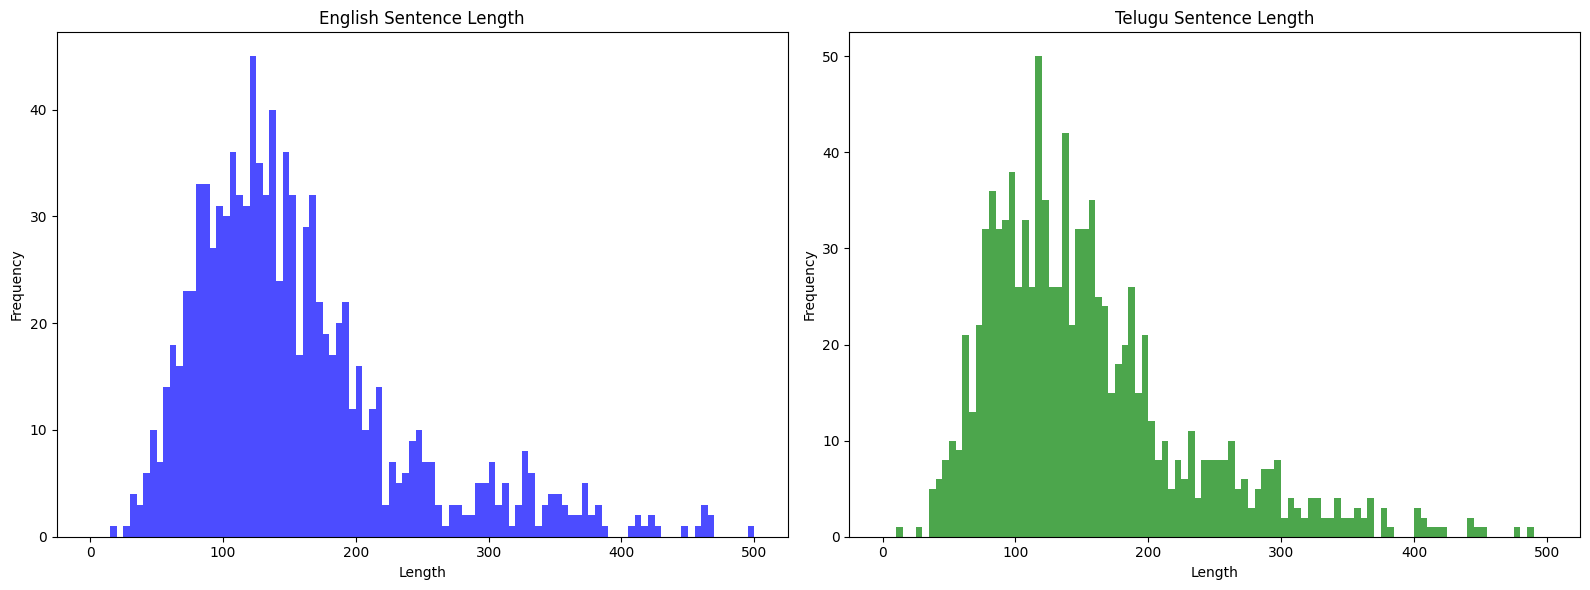

In [74]:
telugu_df['en_length'] = telugu_df['en'].apply(len)
telugu_df['te_length'] = telugu_df['te'].apply(len)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(telugu_df['en_length'], bins=100, range=(0, 500), color='blue', alpha=0.7)
plt.title('English Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(telugu_df['te_length'], bins=100, range=(0, 500), color='green', alpha=0.7)
plt.title('Telugu Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



## Plot Correlation between English and Telugu Sentences

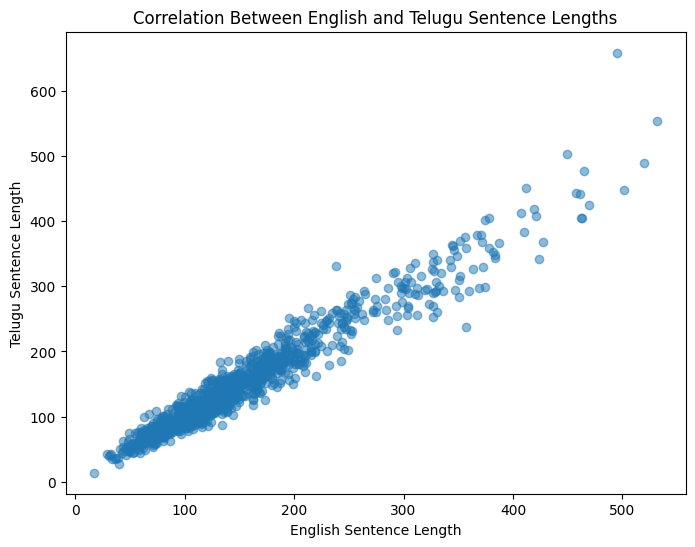

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(telugu_df['en_length'], telugu_df['te_length'], alpha=0.5)
plt.title('Correlation Between English and Telugu Sentence Lengths')
plt.xlabel('English Sentence Length')
plt.ylabel('Telugu Sentence Length')
plt.show()


## Most Commonly Occuring Words

In [76]:
import pandas as pd

from collections import Counter

en_words = ' '.join(telugu_df['en']).split()
te_words = ' '.join(telugu_df['te']).split()

en_word_freq = Counter(en_words)
te_word_freq = Counter(te_words)

# Most common English words
en_common_words = en_word_freq.most_common(10)
te_common_words = te_word_freq.most_common(10)

# Create DataFrames for better presentation
en_df = pd.DataFrame(en_common_words, columns=['Word', 'Frequency'])
te_df = pd.DataFrame(te_common_words, columns=['Word', 'Frequency'])

print("Most Common English Words:")
print(en_df)

print("\nMost Common Telugu Words:")
print(te_df)


Most Common English Words:
  Word  Frequency
0  the       1561
1  and        919
2   of        864
3   in        595
4   to        550
5    a        468
6   is        315
7  The        230
8  for        228
9   by        201

Most Common Telugu Words:
     Word  Frequency
0   మరియు        528
1      ఒక        195
2       ఈ        189
3   నుండి        125
4    లేదా        112
5      లో         77
6       ఆ         75
7   యొక్క         74
8    కూడా         60
9  ద్వారా         47


## Size of the Vocabulary

In [77]:
en_vocab_size = len(set(' '.join(telugu_df['en']).split()))
te_vocab_size = len(set(' '.join(telugu_df['te']).split()))

print(f'English Vocabulary Size: {en_vocab_size}')
print(f'Telugu Vocabulary Size: {te_vocab_size}')


English Vocabulary Size: 9651
Telugu Vocabulary Size: 11373


## Check Duplicate Rows

In [78]:
duplicate_rows = telugu_df[telugu_df.duplicated(['en', 'te'])]
print(f'Number of duplicate rows: {len(duplicate_rows)}')


Number of duplicate rows: 0


# EDA for Hindi Dataset - IN22

In [79]:
raw_dataset = load_dataset('ai4bharat/IN22-Gen', 'eng_Latn-hin_Deva', trust_remote_code=True)

In [80]:
limited_data = raw_dataset

In [81]:
limited_data

DatasetDict({
    gen: Dataset({
        features: ['id', 'context', 'source', 'url', 'domain', 'num_words', 'bucket', 'sentence_eng_Latn', 'sentence_hin_Deva'],
        num_rows: 1024
    })
})

In [82]:
# Create a new DatasetDict if needed
new_dataset_dict = DatasetDict(limited_data)

# Verify the first example to ensure conversion was successful
print(new_dataset_dict["gen"][0])

{'id': 1, 'context': 'A uniform is often viewed as projecting a positive image of an organisation. Maintaining personal hygiene is also an important aspect of personal appearance and dressing. An appearance is a bunch of attributes related with the service person, like their shoes, clothes, tie, jewellery, hairstyle, make-up, watch, cosmetics, perfume, etc.', 'source': 'web', 'url': '', 'domain': 'culture', 'num_words': 24, 'bucket': '18 - 25', 'sentence_eng_Latn': 'An appearance is a bunch of attributes related to the service person, like their shoes, clothes, tie, jewellery, hairstyle, make-up, watch, cosmetics, perfume, etc.', 'sentence_hin_Deva': 'सेवा संबंधी लोगों के लिए भेष कई गुणों का संयोजन है, जैसे कि उनके जूते, कपड़े, टाई, आभूषण, केश शैली, मेक-अप, घड़ी, कॉस्मेटिक, इत्र, आदि।'}


In [83]:
# Convert the dataset to a Pandas DataFrame
hindi_df = new_dataset_dict["gen"].to_pandas()

# Rename the columns
hindi_df = hindi_df.rename(columns={"sentence_eng_Latn": "en", "sentence_hin_Deva": "hi"})

# Drop the 'idx' column if it is not needed
hindi_df = hindi_df.drop(columns=['id', 'context', 'source', 'url', 'domain', 'num_words', 'bucket'])

# Display the first few rows to verify
hindi_df.head()

,en,hi
0,An appearance is a bunch of attributes related...,सेवा संबंधी लोगों के लिए भेष कई गुणों का संयोज...
1,"Ajanta, located in the Aurangabad District of ...",महाराष्ट्र के औरंगाबाद जिले में स्थित अजंता मे...
2,"Body colour gets merged with the outer line, c...","विस्तार का असर बनाते हुए, शरीर का रंग बाहरी रे..."
3,Ashoka started making extensive use of stone f...,अशोक ने व्यापक रूप से मूर्तियों और शानदार स्मा...
4,"Potatoes mixed in masalas, coated in besan bat...",महाराष्ट्र के इस स्वादिष्ट और प्रसिद्ध व्यंजन ...


## Check Unique and Null Values

In [84]:
hindi_df.describe()

,en,hi
count,1024,1024
unique,1024,1024
top,An appearance is a bunch of attributes related...,सेवा संबंधी लोगों के लिए भेष कई गुणों का संयोज...
freq,1,1


In [85]:
print(hindi_df.isnull().sum())

en    0
hi    0
dtype: int64


## Plot Sentences Lengths

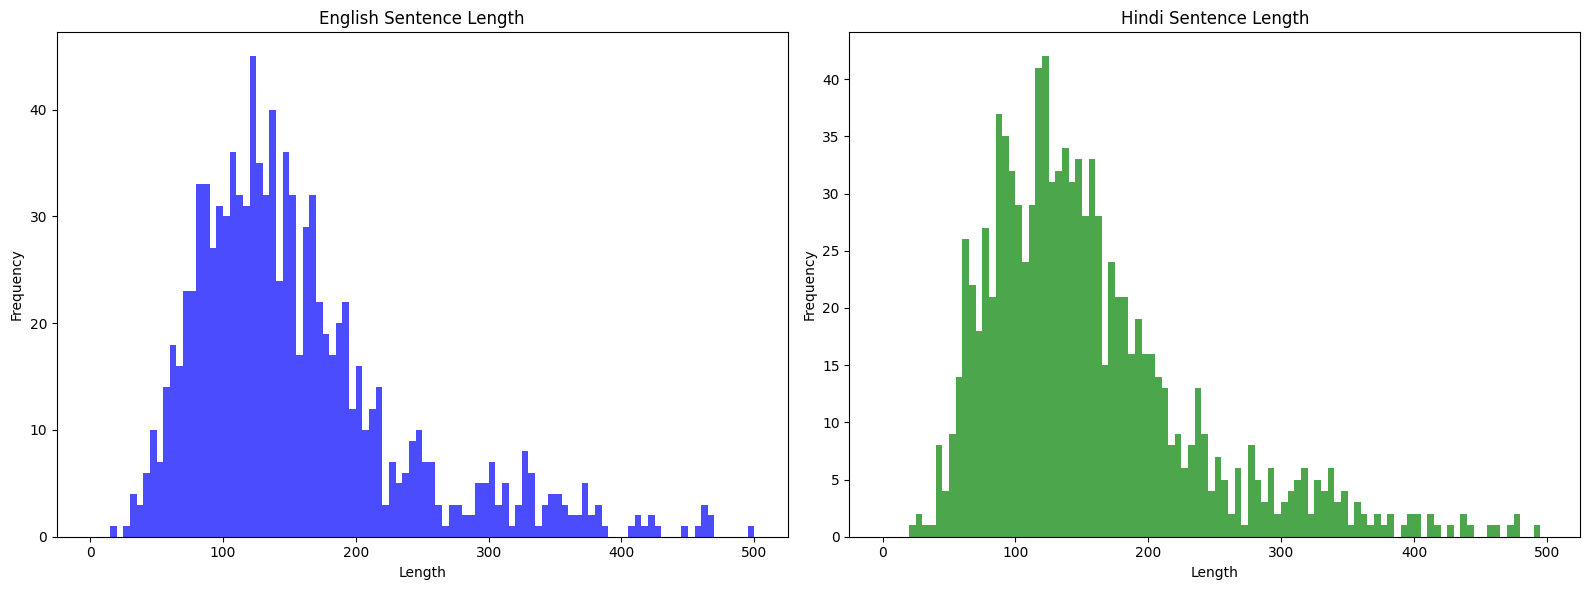

In [86]:
hindi_df['en_length'] = hindi_df['en'].apply(len)
hindi_df['hi_length'] = hindi_df['hi'].apply(len)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(hindi_df['en_length'], bins=100, range=(0, 500), color='blue', alpha=0.7)
plt.title('English Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(hindi_df['hi_length'], bins=100, range=(0, 500), color='green', alpha=0.7)
plt.title('Hindi Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



## Plot Correlation between English and Hindi Sentences

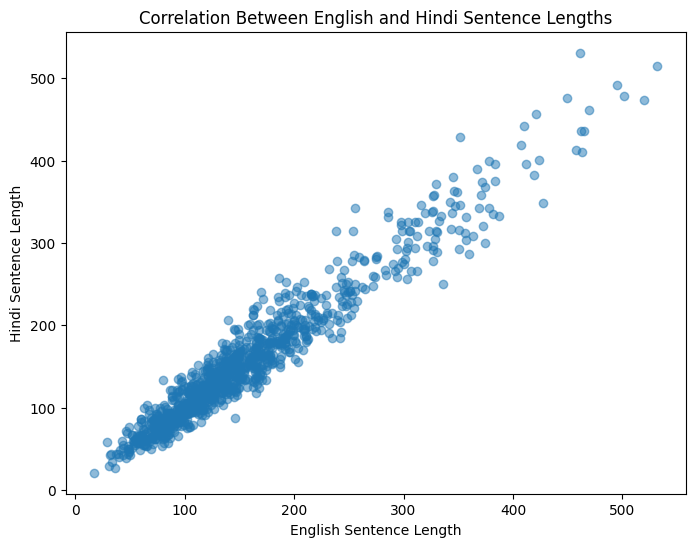

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(hindi_df['en_length'], hindi_df['hi_length'], alpha=0.5)
plt.title('Correlation Between English and Hindi Sentence Lengths')
plt.xlabel('English Sentence Length')
plt.ylabel('Hindi Sentence Length')
plt.show()


## Most Commonly Occuring Words

In [88]:
import pandas as pd

from collections import Counter

en_words = ' '.join(hindi_df['en']).split()
hi_words = ' '.join(hindi_df['hi']).split()

en_word_freq = Counter(en_words)
hi_word_freq = Counter(hi_words)

# Most common English words
en_common_words = en_word_freq.most_common(10)
hi_common_words = hi_word_freq.most_common(10)

# Create DataFrames for better presentation
en_df = pd.DataFrame(en_common_words, columns=['Word', 'Frequency'])
hi_df = pd.DataFrame(hi_common_words, columns=['Word', 'Frequency'])

print("Most Common English Words:")
print(en_df)

print("\nMost Common Hindi Words:")
print(hi_df)


Most Common English Words:
  Word  Frequency
0  the       1561
1  and        919
2   of        864
3   in        595
4   to        550
5    a        468
6   is        315
7  The        230
8  for        228
9   by        201

Most Common Hindi Words:
  Word  Frequency
0   के       1472
1  में       1058
2   और        826
3   की        643
4   से        567
5   को        446
6   का        431
7  है।        351
8   है        272
9  लिए        263


## Size of the Vocabulary

In [89]:
en_vocab_size = len(set(' '.join(hindi_df['en']).split()))
hi_vocab_size = len(set(' '.join(hindi_df['hi']).split()))

print(f'English Vocabulary Size: {en_vocab_size}')
print(f'Hindi Vocabulary Size: {hi_vocab_size}')


English Vocabulary Size: 9651
Hindi Vocabulary Size: 8023


## Check Duplicate Rows

In [90]:
duplicate_rows = hindi_df[hindi_df.duplicated(['en', 'hi'])]
print(f'Number of duplicate rows: {len(duplicate_rows)}')


Number of duplicate rows: 0
